In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Cleaning text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

reviews['body'][0]
type(reviews)


pandas.core.frame.DataFrame

In [3]:
# 0.4 Link review data to item data bsed on common column "asin"
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")
reviews.head()
print(reviews['brand'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
67981       Sony
67982       Sony
67983       Sony
67984      Apple
67985    Samsung
Name: brand, Length: 67986, dtype: object


In [4]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)


,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0


In [5]:
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)


In [6]:
xiaomi.dropna(inplace=True)
xiaomi[reviews['rating'] != 3]
xiaomi['Positivity'] = np.where(xiaomi['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating', 'date', 'verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
xiaomi.drop(cols, axis=1, inplace=True)
xiaomi.head()

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,body,Positivity
64068,The Best,1
64704,"I'm in love with this phone, for me it would b...",1
64537,"I'm in love with this phone, for me it would b...",1
59820,Excellent product!,1
62790,"There are lots of pros to this phone. However,...",1


In [7]:
xiaomi.rename(columns={"body": "Review"}, inplace=True)
xiaomi= xiaomi.dropna(how='any',axis=0)
xiaomi.to_csv (r'xiaomi_new.csv', index = False, header=True)
df_xiaomi = pd.read_csv("xiaomi_new.csv")
xiaomi

,Review,Positivity
64068,The Best,1
64704,"I'm in love with this phone, for me it would b...",1
64537,"I'm in love with this phone, for me it would b...",1
59820,Excellent product!,1
62790,"There are lots of pros to this phone. However,...",1
...,...,...
53076,Muy buen teléfono. Muy completo. Hace años que...,1
52923,I ordered this phone about 4 months ago switch...,1
52919,I purchased this phone in feburary 2019 it is ...,0
50622,Hola ya hace más de un mes di la devolución de...,0


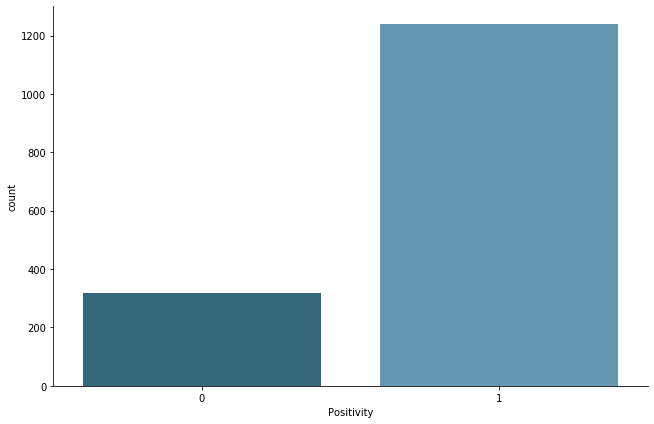

In [21]:
sns.catplot(x="Positivity", data=xiaomi, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = xiaomi["Review"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
 # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

[nltk_data] Downloading package wordnet to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# 1.2 Apply preprocess function to the dataframe
xiaomi["Review"] = xiaomi["Review"].astype("str")
xiaomi["clean_text"] = xiaomi["Review"].apply(clean_text)

In [10]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [11]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

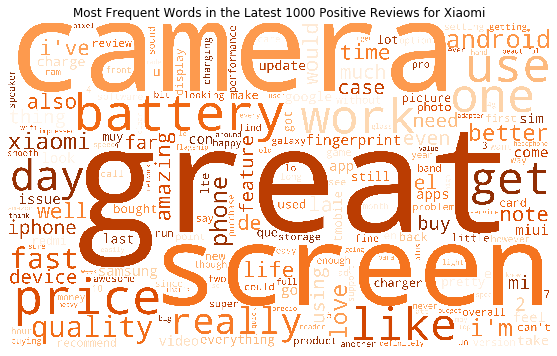

In [12]:
# 2.6 Plot wordclouds for latest 1000 reviews for Xiaomi
xiaomi_pos = " ".join(xiaomi[xiaomi["Positivity"]==1]["clean_text"][0:1000])
xiaomi_pos_word_freq = word_freq_dict(xiaomi_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(xiaomi_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Xiaomi")

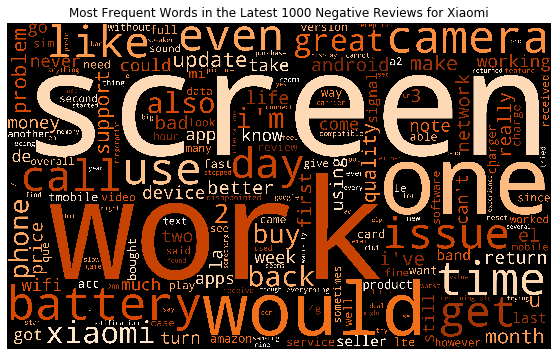

In [13]:
xiaomi_neg = " ".join(xiaomi[xiaomi["Positivity"]==0]["clean_text"][0:1000])
xiaomi_neg_word_freq = word_freq_dict(xiaomi_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(xiaomi_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Xiaomi")

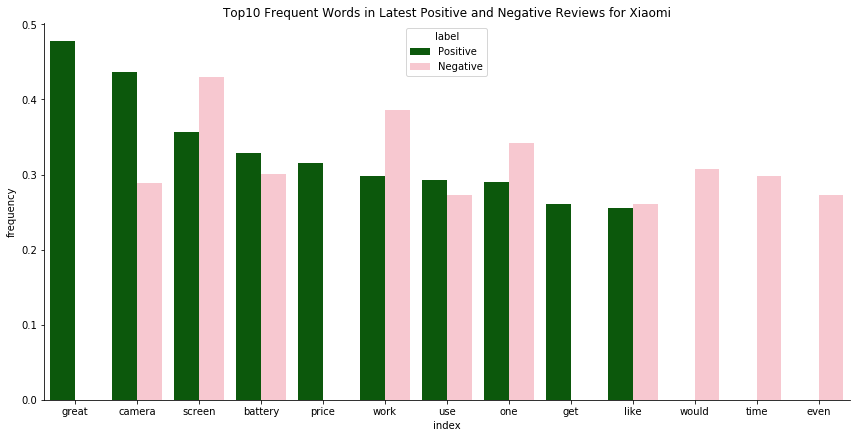

In [14]:
topn_wordfreq_bar_both(xiaomi_pos_word_freq, xiaomi_neg_word_freq, 
                       min(sum(xiaomi["Positivity"]==1), 1000), 
                       min(sum(xiaomi["Positivity"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Xiaomi", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

In [15]:
corpus = []
for i in range(0,1557):
    review = re.sub('[^a-zA-Z]', ' ',df_xiaomi['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_xiaomi.iloc[:,1] 

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[  2  68]
 [  1 319]]


In [18]:
(2 + 319)/389

0.8251928020565553

Text(0.5, 257.44, 'Predicted label')

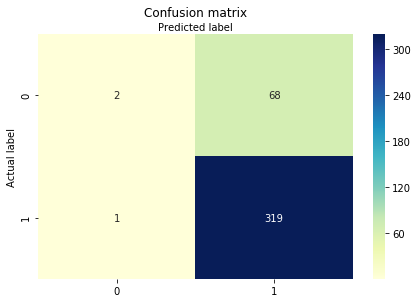

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.823076923076923
Precision: 0.8242894056847545
Recall: 0.996875
